# Investigating 1/F changes in auditory oddball paradigm

## Data Description

We adopted a roving oddball paradigm. The trains of repetitive tones of different frequencies were randomly presented. Epidural ECoG recordings were taken in the passive listening condition while monkeys were awake.
ECoG data were sampled at 1KHz.


Komatsu, M., Takaura, K., & Fujii, N. (2015). "Mismatch negativity in common marmosets: Whole-cortical recordings with multi-channel electrocorticograms." Scientific Reports, 5, 15006.

Canales-Johnson, A., Borges, A. F. T., Komatsu, M., Fujii, N., Fahrenfort, J. J., Miller, K. J., & Noreika, V. (2021). Broadband Dynamics Rather than Frequency-Specific Rhythms Underlie Prediction Error in the Primate Auditory Cortex. Journal of Neuroscience, 41(45), 9374-9391.

## Init

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
from mne_bids import BIDSPath, read_raw_bids

import os
import re

import mne
from mne.viz import plot_alignment, snapshot_brain_montage

from scipy.io import loadmat

from neurodsp.spectral import compute_spectrum
from neurodsp.filt import filter_signal

from fooof import FOOOF, FOOOFGroup
from fooof.objs import compare_info

In [96]:
subfolder = "./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/"
#subfolder = "./20151008S2_Auditory+Oddball_Go_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/"
fs = 1000

## load data

In [97]:
# Function to extract channel name from filename
def extract_channel_name(filename):
    # Assuming the channel name is between 'ch' and '.mat'
    start_index = filename.find('ch') + 2
    end_index = filename.find('.mat')
    return filename[start_index:end_index]

# Function to apply common median reference to the data
def apply_common_median_reference(raw):
    picks = mne.pick_types(raw.info, eeg=True, exclude='bads')
    raw.set_eeg_reference(ref_channels='average', projection=True, verbose=False)

In [98]:
# Folder containing data files
data_folder = './20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap'
subfolder = './20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap'

# List all .mat files in the folder
mat_files = [file for file in os.listdir(data_folder) if file.endswith('.mat')]

### Generate reference

In [99]:
# Loop through data files and apply common median reference
for mat_file in mat_files:
    file_path = os.path.join(data_folder, mat_file)
    
    # Load ECoG data from .mat file
    print(file_path)
    match = re.search(r'(\d+).mat', file_path)
    if match:
        match = match[0].split(".mat")[0]
    else:
        break

    ecog_data = loadmat(file_path)["ECoGData_ch" + match]

    # Extract channel name from filename
    channel_name = extract_channel_name(mat_file)

    # Create MNE Raw object
    info = mne.create_info(
        ch_names=[channel_name], 
        sfreq=fs, 
        ch_types='ecog',
        verbose=False
    )
    raw = mne.io.RawArray(ecog_data, info, verbose=False)

    # Apply common median reference
    apply_common_median_reference(raw)
    
    #raw.apply_proj()

    #raw.set_eeg_reference(ref_channels='average', projection=True)
    
    
    # Save the preprocessed data
    #output_path = os.path.join(data_folder, f'rereferenced_{mat_file}')
    output_path = os.path.join(data_folder, f'rereferenced_abc.fif')
    raw.save(output_path, overwrite=True, verbose=False)

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch52.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch2.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch3.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch53.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch47.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch51.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch1.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch44.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch50.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch54.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch40.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch4.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch5.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch41.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch55.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch43.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch57.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch7.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch6.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch56.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch42.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch25.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch31.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch19.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch18.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch30.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch24.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch32.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch26.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch27.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch33.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch37.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch23.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch22.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch36.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch20.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch34.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch35.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch21.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch10.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch38.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch39.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch11.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch13.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch12.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch16.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch17.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch29.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch15.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch14.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch28.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch64.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch58.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch8.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch9.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch59.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch49.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch61.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch60.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch48.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch62.mat
./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/ECoG_ch63.mat


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True, verbose=False)
/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/447194279.py:38: RuntimeWarning: This filename (/Users/thibault/Documents/UGent - Datacenter Operator/SURF/20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.f

## Generate spectra before and after oddball

In [136]:
data = mne.io.read_raw_fif(subfolder + "/rereferenced_abc.fif").get_data()[0]

data = filter_signal(data, fs, "highpass", f_range=2.)


repEvent = loadmat("./repEvent.mat")

train_onset = repEvent["repEvent"][:,5]

arr_before = []
arr_after = []

jump = 3000

for index, onset in enumerate(train_onset):
    freqs, powers_bef = compute_spectrum(data[onset-jump:onset], fs)
    freqs, powers_aft = compute_spectrum(data[onset:onset+jump], fs)
    
    #np.array(arr_after.append(np.abs(powers_aft)))
    #np.array(arr_before.append(np.abs(powers_bef)))
    
    np.array(arr_after.append(powers_aft))
    np.array(arr_before.append(powers_bef))
    


fm_before = FOOOFGroup(verbose=False)
fm_after = FOOOFGroup(verbose=False)

Opening raw data file ./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average ECOG reference (1 x 1)  idle
    Range : 0 ... 911900 =      0.000 ...   911.900 secs
Ready.


/var/folders/y7/lqlcz8gx66dck783yxl1cxbw0000gn/T/ipykernel_2772/3688802272.py:1: RuntimeWarning: This filename (./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/rereferenced_abc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(subfolder + "/rereferenced_abc.fif").get_data()[0]


### Fooof fitting

#### Mean before

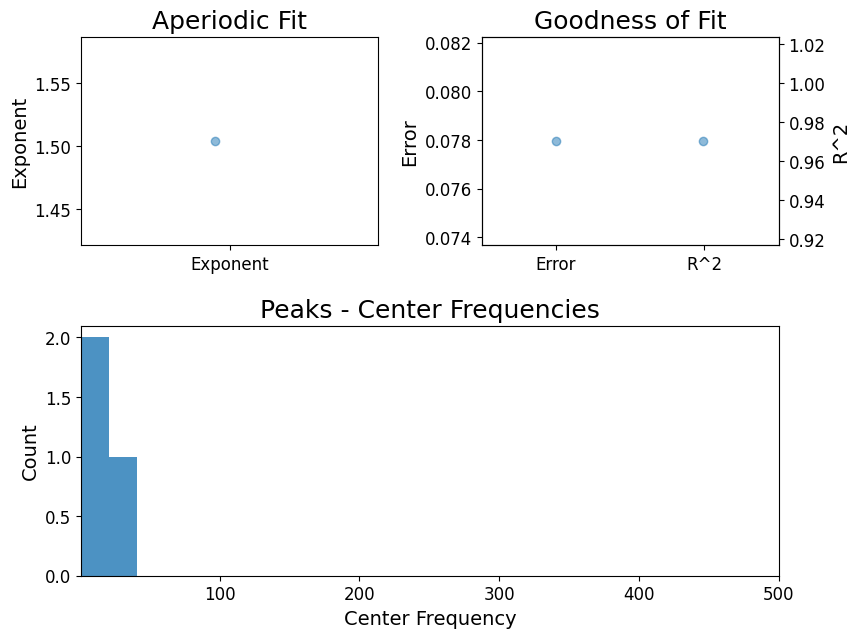

In [137]:
fm_before.fit(
    np.array(freqs), 
    np.array([np.mean(arr_before, axis=0)])
)
fm_before.plot()

#### Mean after

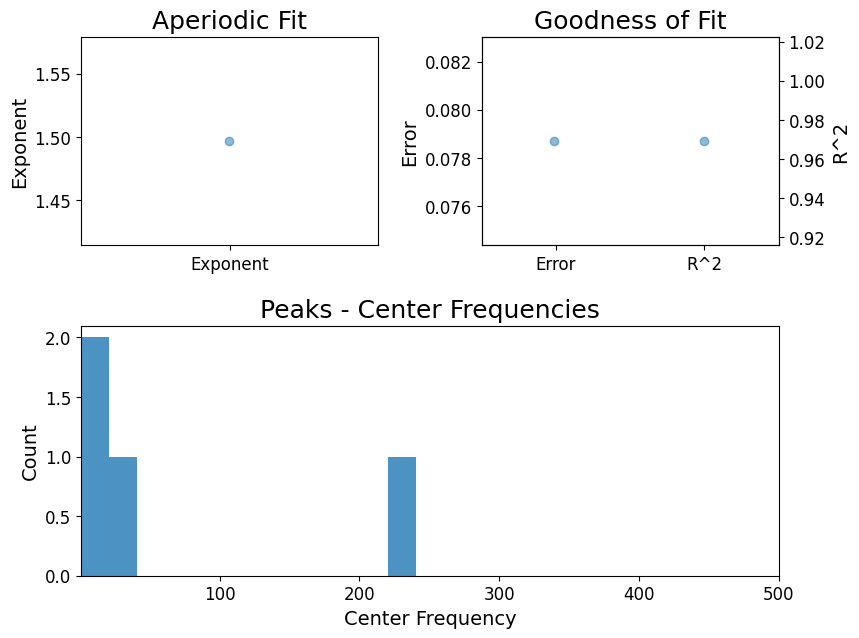

In [138]:
fm_after.fit(
    np.array(freqs), 
    np.array([np.mean(arr_after, axis=0)])
)
fm_after.plot()

#### All before (compute ~5min)

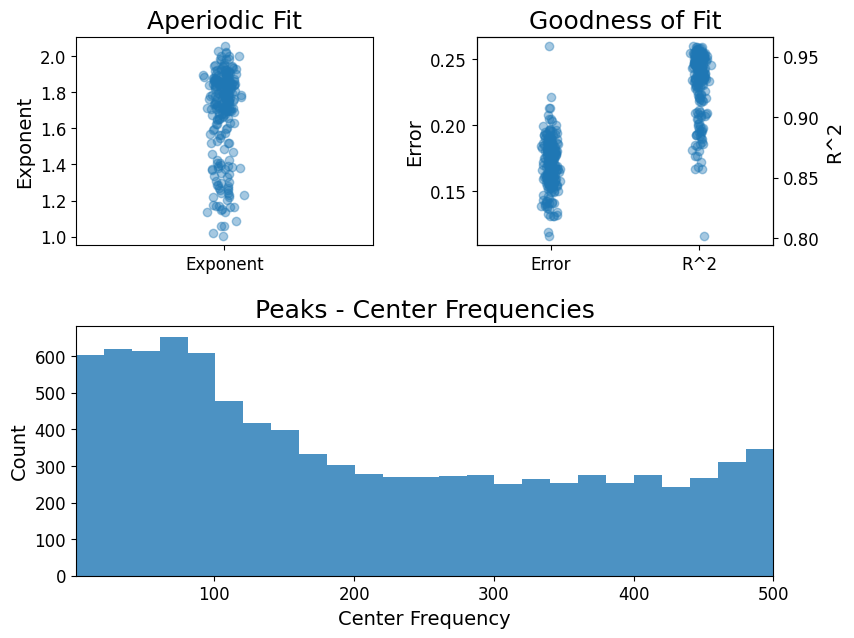

In [139]:
fm_before.fit(
    np.array(freqs), 
    np.array(arr_before)
)
fm_before.plot()

#### All after (compute ~5min)

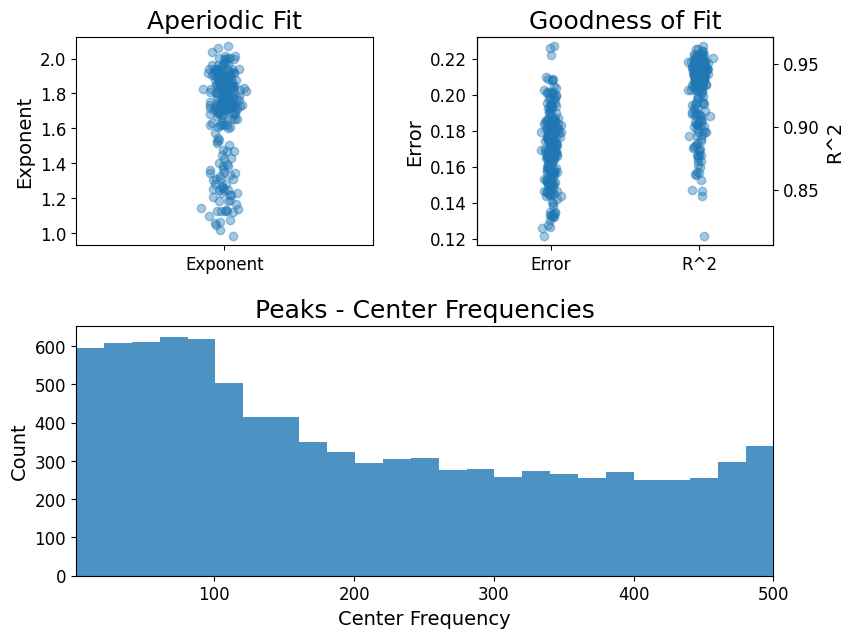

In [140]:
fm_after.fit(
    np.array(freqs), 
    np.array(arr_after)
)
fm_after.plot()

### Visual inspection

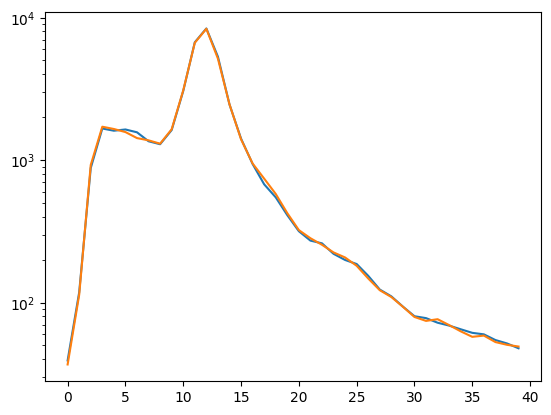

In [141]:
plt.semilogy(freqs[:40], (np.mean(arr_before, axis=0)[:40]))
plt.semilogy(freqs[:40], (np.mean(arr_after, axis=0)[:40]))

plt.show()

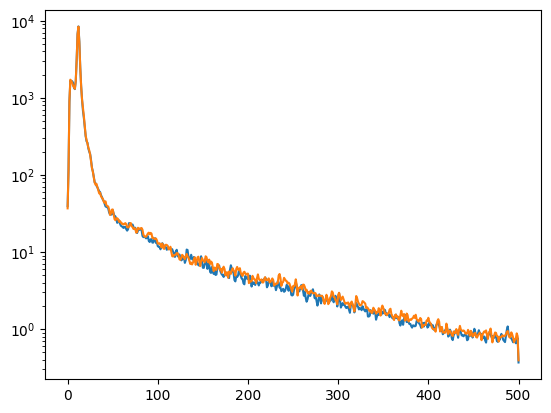

In [142]:
plt.semilogy(freqs[:], (np.mean(arr_before, axis=0)[:]))
plt.semilogy(freqs[:], (np.mean(arr_after, axis=0)[:]))

plt.show()

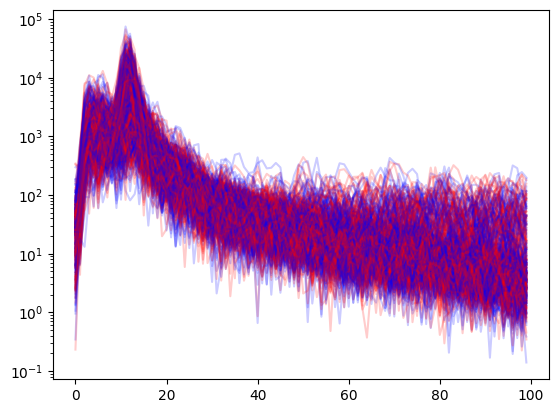

In [143]:
for index, item in enumerate(arr_before):
    plt.semilogy(freqs[:100], (arr_before[index][:100]), color="blue", alpha=.2)
    plt.semilogy(freqs[:100], (arr_after[index][:100]), color="red", alpha=.2)

plt.show()

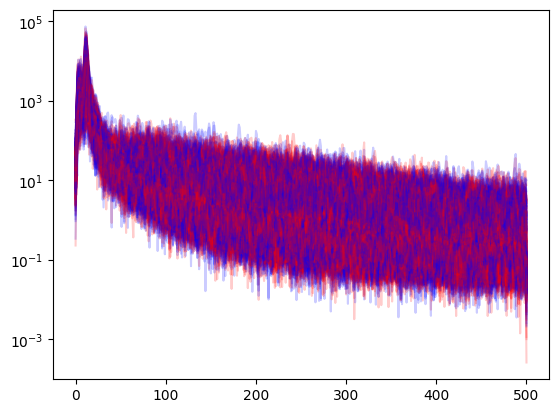

In [144]:
for index, item in enumerate(arr_before):
    plt.semilogy(freqs, (arr_before[index]), color="blue", alpha=.2)
    plt.semilogy(freqs, (arr_after[index]), color="red", alpha=.2)

plt.show()

### Investigate outliers

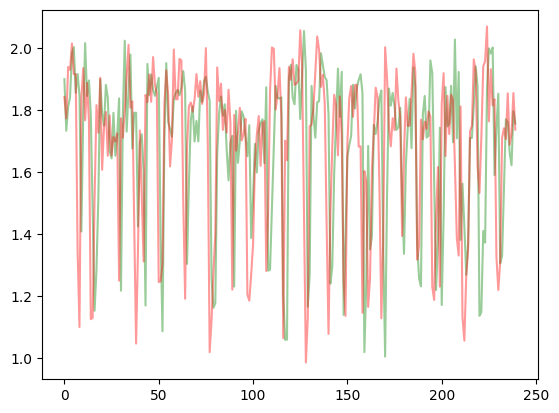

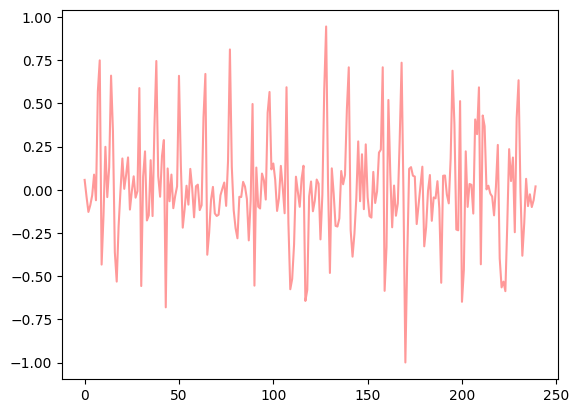

In [190]:
exps_bef = fm_before.get_params('aperiodic_params', 'exponent')
exps_aft = fm_after.get_params('aperiodic_params', 'exponent')

plt.plot(range(len(exps_bef)), exps_bef, alpha=.4, label="FOOOF fit: before", color="green")

plt.plot(range(len(exps_aft)), exps_aft, alpha=.4, label="FOOOF fit: after", color="red")
plt.show()


plt.plot(range(len(exps_aft)), exps_bef - exps_aft, alpha=.4, label="FOOOF fit: after", color="red")
plt.show()

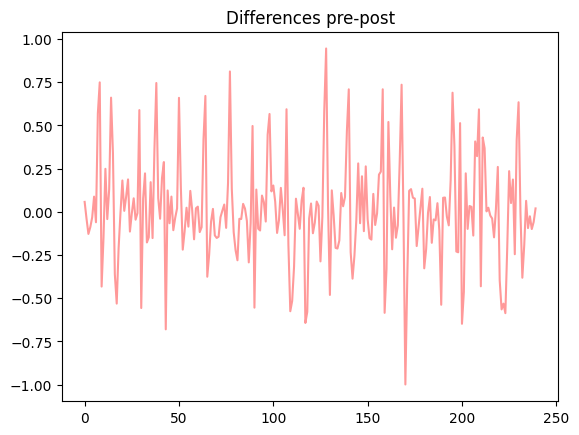

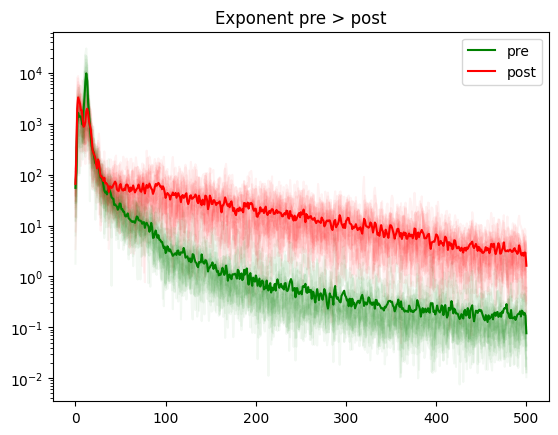

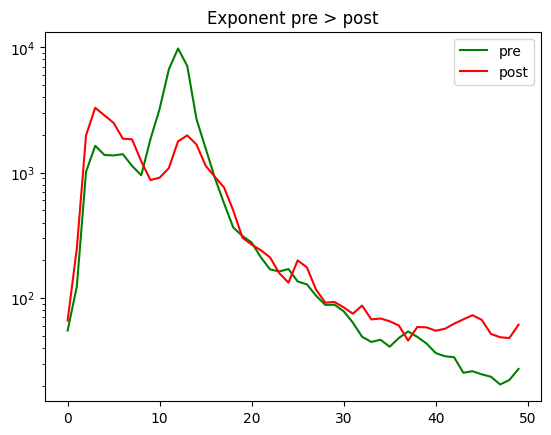

In [239]:
exps_diff = exps_bef - exps_aft

plt.title("Differences pre-post")
plt.plot(range(len(exps_aft)), exps_diff, alpha=.4, label="FOOOF fit: after", color="red")
plt.show()

prepost_diff_pos = [] # meaning exponent before is larger than after
prepost_diff_neg = []
prepost_no_diff = []

for (i, item) in enumerate(exps_diff):
    if np.abs(item) > .5:
        
        if item > .5:
            prepost_diff_pos.append(i)
            plt.semilogy(freqs, arr_before[i], alpha=.05, color="green")
            plt.semilogy(freqs, arr_after[i], alpha=.05, color="red")
        else:
            prepost_diff_neg.append(i)

    else:
        prepost_no_diff.append(i)

demo_bef = [arr_before[i] for i in prepost_diff_pos]
demo_aft = [arr_after[i] for i in prepost_diff_pos]


plt.semilogy(freqs, np.mean(demo_bef, axis=0), color="green", label="pre")
plt.semilogy(freqs, np.mean(demo_aft, axis=0), color="red", label="post")
plt.title("Exponent pre > post")
plt.legend()
plt.show()

plt.title("Exponent pre > post")
plt.semilogy(freqs[:50], np.mean(demo_bef, axis=0)[:50], color="green", label="pre")
plt.semilogy(freqs[:50], np.mean(demo_aft, axis=0)[:50], color="red", label="post")
plt.legend()
plt.show()

#### Investigating pre-post differences


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

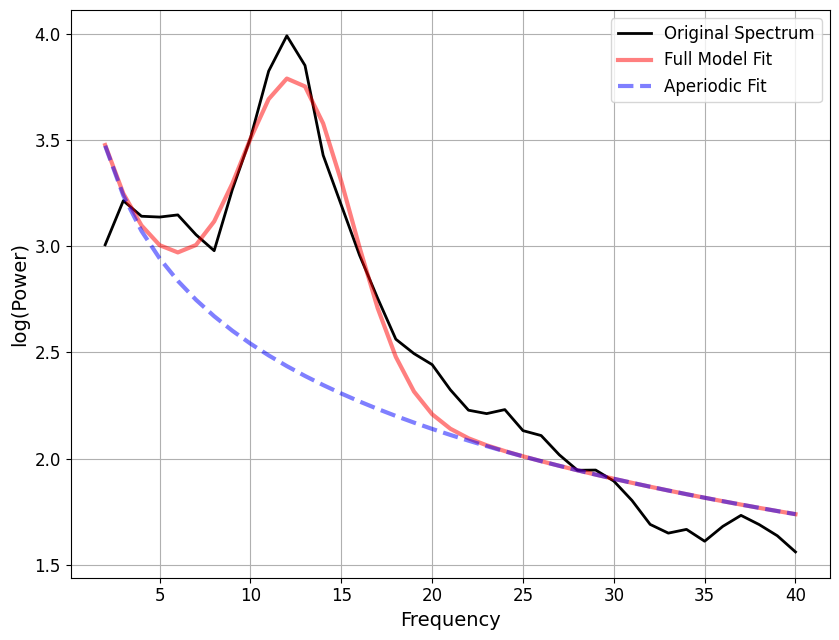

In [228]:
demo_one = FOOOF()
demo_one.report(freqs, np.mean(demo_bef, axis=0), freq_range=[2,40])


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

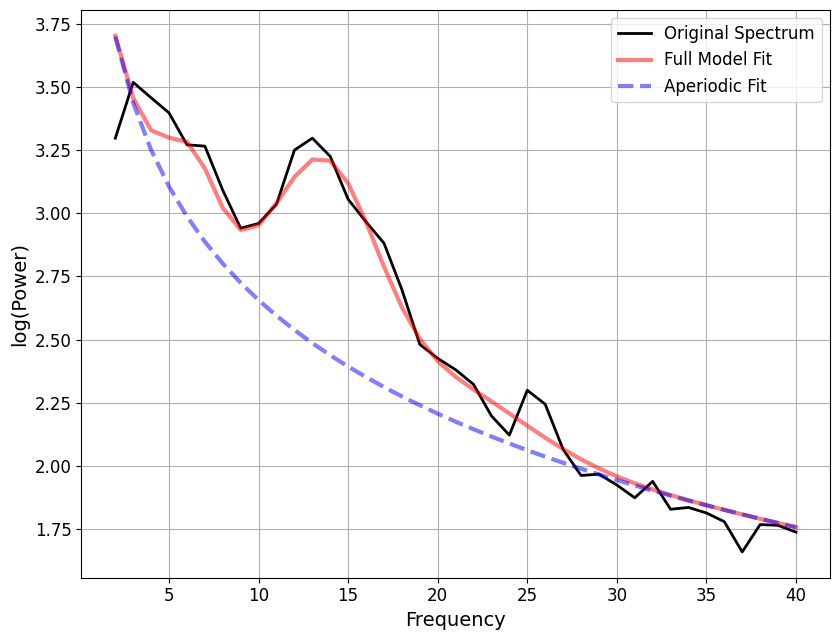

In [229]:
demo_two = FOOOF()
demo_two.report(freqs, np.mean(demo_aft, axis=0), freq_range=[2,40])

#### Investigating pre-post similarities

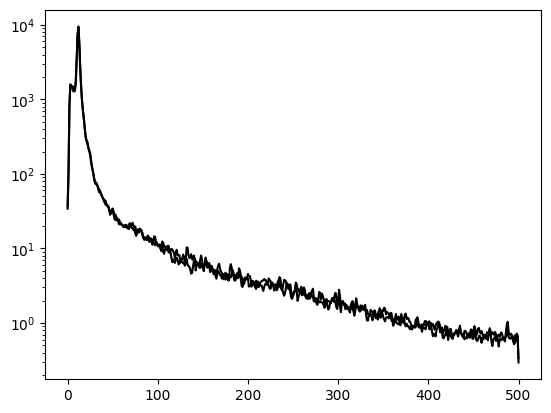

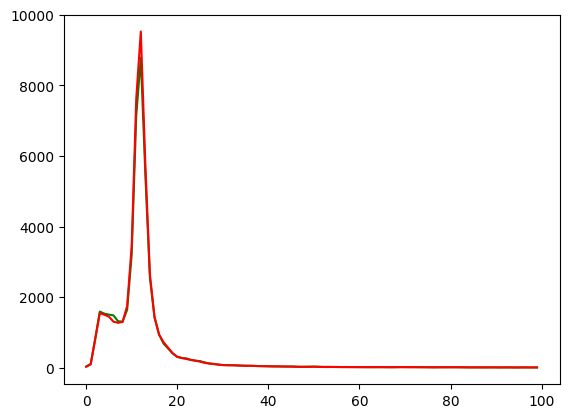

In [213]:
demo_bef = [arr_before[i] for i in prepost_no_diff]
demo_aft = [arr_after[i] for i in prepost_no_diff]

plt.semilogy(freqs, np.mean(demo_bef, axis=0), color="black")
plt.semilogy(freqs, np.mean(demo_aft, axis=0), color="black")
plt.show()

plt.plot(freqs[:100], np.mean(demo_bef, axis=0)[:100], color="green")
plt.plot(freqs[:100], np.mean(demo_aft, axis=0)[:100], color="red")
plt.show()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

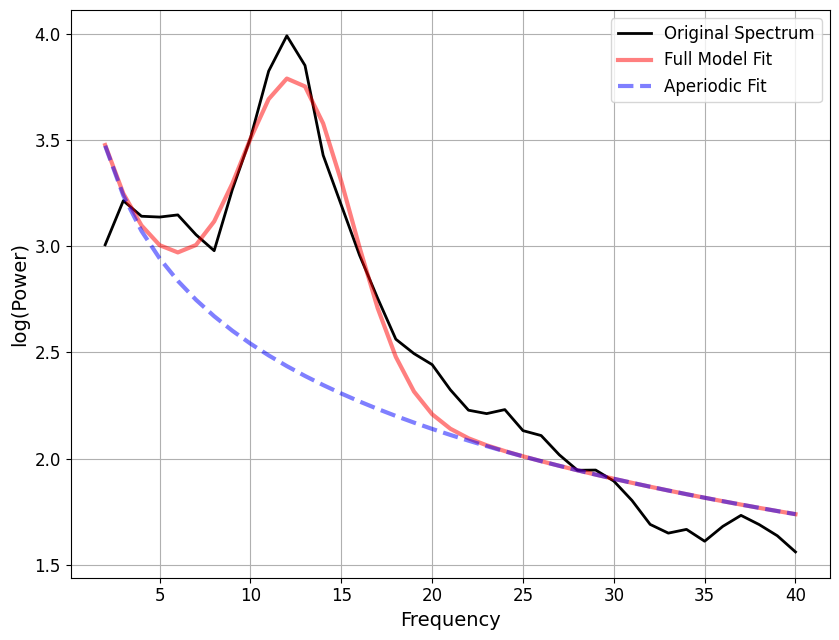

In [230]:
demo_one = FOOOF()
demo_one.report(freqs, np.mean(demo_bef, axis=0), freq_range=[2,40])


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

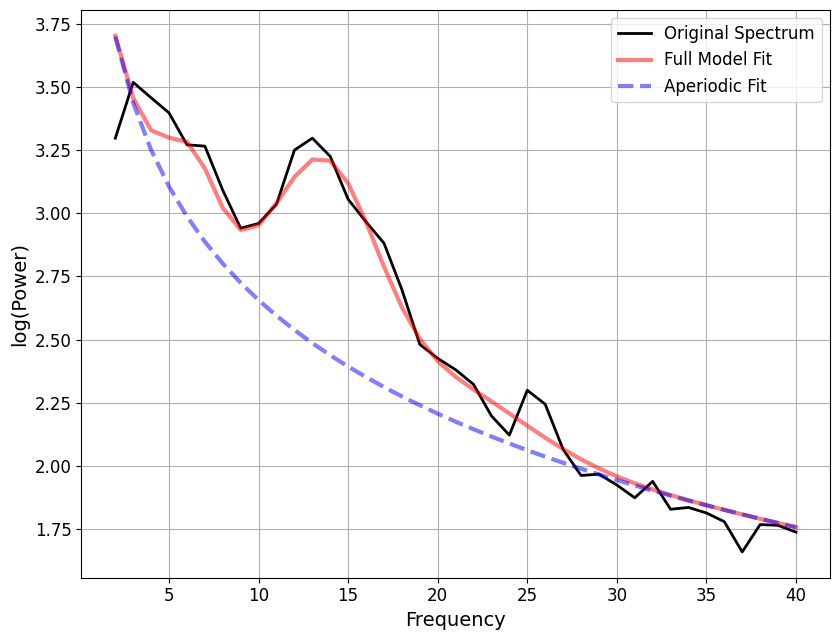

In [231]:
demo_two = FOOOF()
demo_two.report(freqs, np.mean(demo_aft, axis=0), freq_range=[2,40])

### Investigate post > pre

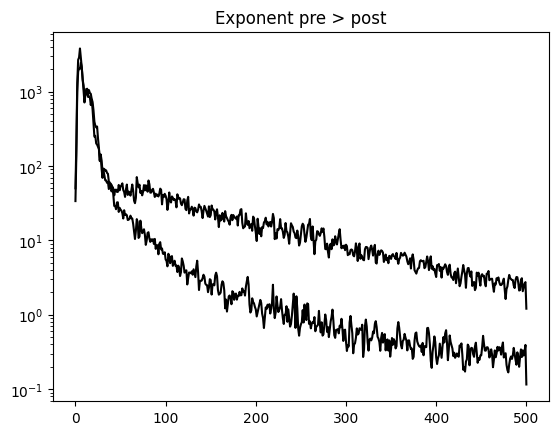

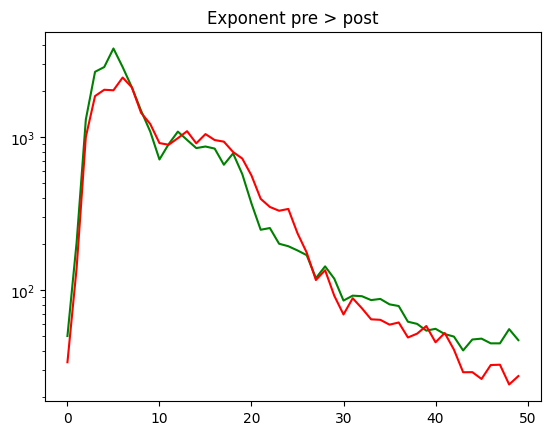


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

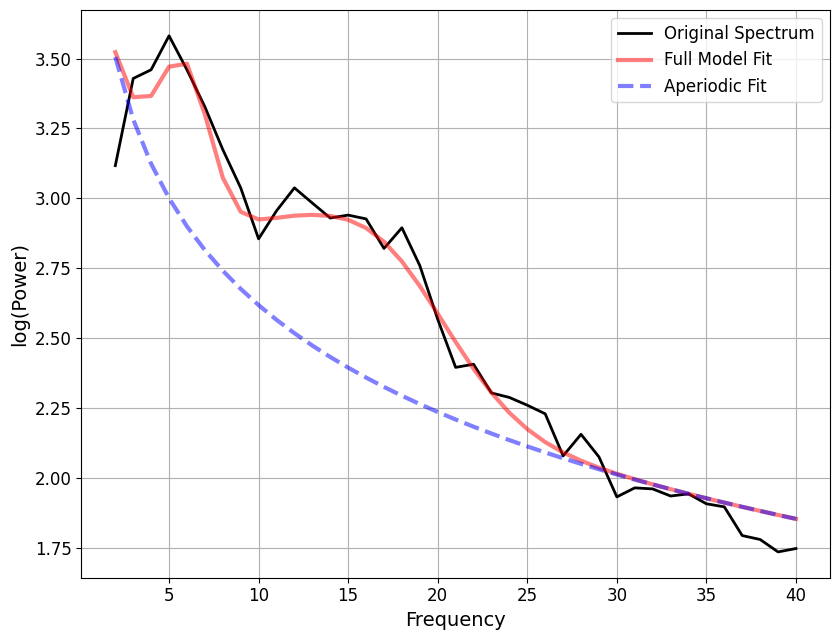

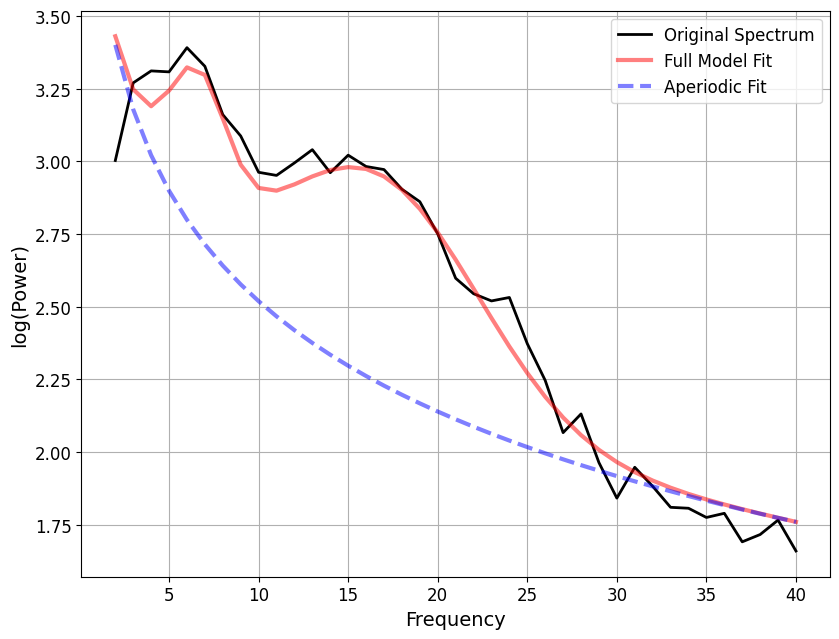

In [233]:
demo_bef2 = [arr_before[i] for i in prepost_diff_neg]
demo_aft2 = [arr_after[i] for i in prepost_diff_neg]


plt.semilogy(freqs, np.mean(demo_bef2, axis=0), color="black")
plt.semilogy(freqs, np.mean(demo_aft2, axis=0), color="black")
plt.title("Exponent pre > post")
plt.show()

plt.title("Exponent pre > post")
plt.semilogy(freqs[:50], np.mean(demo_bef2, axis=0)[:50], color="green", label="pre")
plt.semilogy(freqs[:50], np.mean(demo_aft2, axis=0)[:50], color="red", label="post")
plt.show()


demo_one2 = FOOOF()
demo_one2.report(freqs, np.mean(demo_bef2, axis=0), freq_range=[2,40])

demo_two2 = FOOOF()
demo_two2.report(freqs, np.mean(demo_aft2, axis=0), freq_range=[2,40])

## Searching for underlying reason for changes in 1/F in experimental method

The first tone of a train is considered as a deviant, which eventually became a standard stimulus after a few repetitions. The roving oddball paradigm allows us exactly the same physical properties for deviant and standard tones. We hypothesised that common marmosets would also be sensitive to this paradigm.



In [240]:
#print(prepost_diff_neg)
#print(repEvent["repEvent"])
print(np.array(repEvent["repEvent"]).shape)

print("---", np.array(repEvent["repEvent"])[:, 0])

all_before = [repEvent["repEvent"][i - 1] for i in prepost_diff_neg]
all_current = [repEvent["repEvent"][i] for i in prepost_diff_neg]

for index, item in enumerate(all_before):
    print(f'all_before:{all_before[index]} :: all_current:{all_current[index]}')


(240, 6)
--- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60  1  2  3  4  5  6  7  8  9 10 11 12
 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60  1  2  3  4  5  6  7  8  9 10 11 12
 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60]
all_before:[    17      5      3    503     11 176666] :: all_current:[    18      3     14    503      3 182199]
all_before:[    30     19     15    503     11 208355] :: all_current:[    31     15     14    503     11 213888]
all_before:[    43      8   

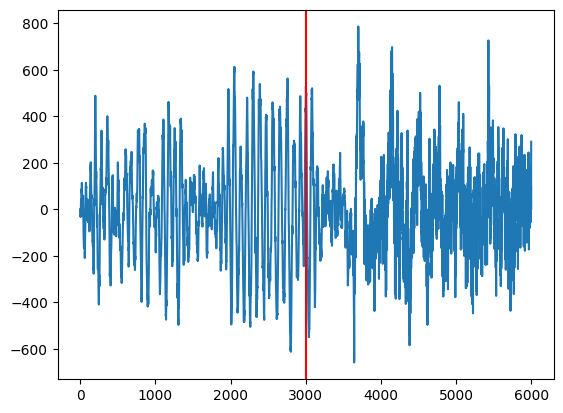

In [257]:
timestamp = repEvent["repEvent"][prepost_diff_pos[0], 5]

plt.plot(data[timestamp - 3000 : timestamp + 3000])
plt.axvline(3000, color="red")
